In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

2023-01-19 22:07:44.813321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

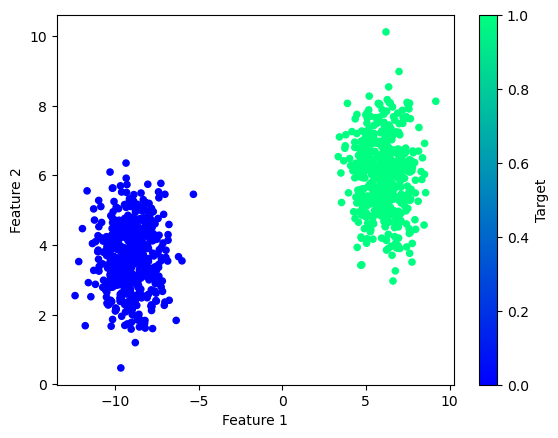

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

2023-01-19 22:07:53.764400: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7666 - accuracy: 0.3027
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7513 - accuracy: 0.3360
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7381 - accuracy: 0.3760
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7272 - accuracy: 0.4093
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7181 - accuracy: 0.4387
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7099 - accuracy: 0.4533
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.4880
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5160
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5440
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5667
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.9880
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1412 - accuracy: 0.9880
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9880
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1350 - accuracy: 0.9880
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.9880
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1292 - accuracy: 0.9893
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1264 - accuracy: 0.9907
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.9920
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.9920
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9920
Epoch 93/100


<AxesSubplot: >

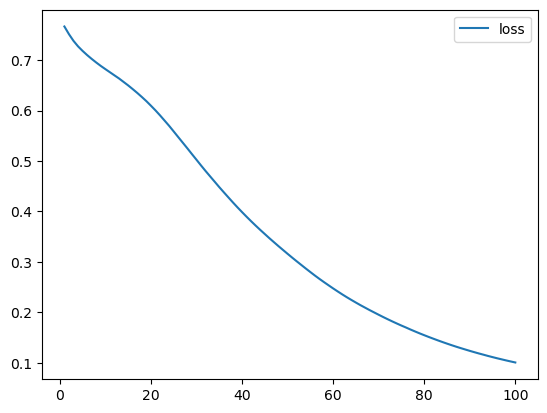

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot: >

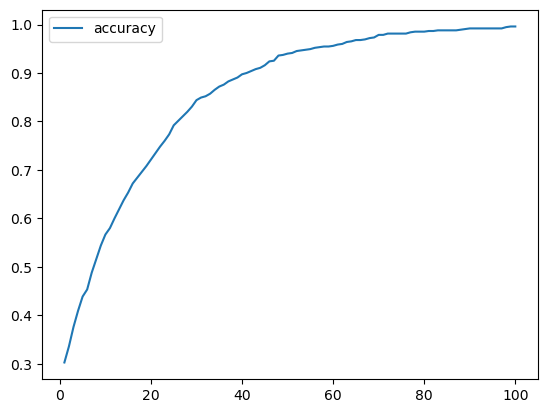

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0924 - accuracy: 1.0000 - 156ms/epoch - 19ms/step
Loss: 0.09238910675048828, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 79ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

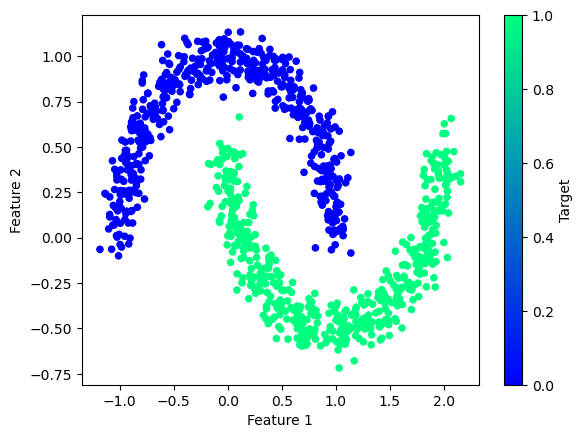

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 1.4030 - accuracy: 0.3507
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1996 - accuracy: 0.3760
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0702 - accuracy: 0.4040
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9829 - accuracy: 0.4240
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9213 - accuracy: 0.4480
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8747 - accuracy: 0.4667
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8372 - accuracy: 0.4907
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8060 - accuracy: 0.5187
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7787 - accuracy: 0.5413
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7550 - accuracy: 0.5573
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8813
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8813
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8827
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.8853
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2952 - accuracy: 0.8867
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.8867
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8867
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8880
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.8893
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8907
Epoch 93/100


<AxesSubplot: >

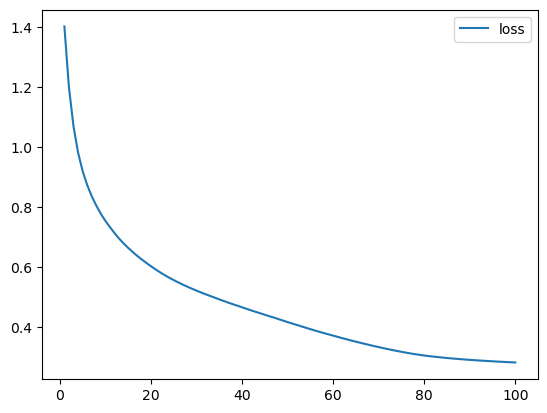

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot: >

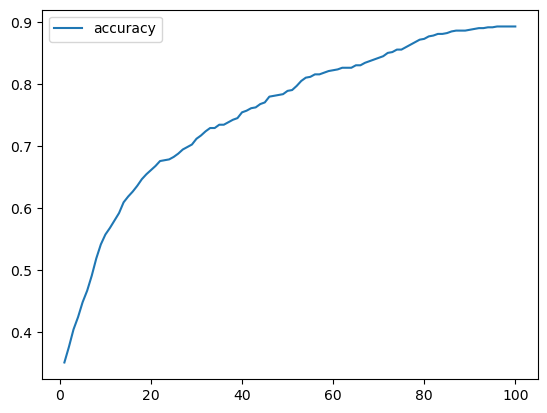

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.9816 - accuracy: 0.5120
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9166 - accuracy: 0.4933
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8571 - accuracy: 0.4200
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8031 - accuracy: 0.4293
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7554 - accuracy: 0.4533
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.5160
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6293
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.8093
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.8427
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.8520
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.9080
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9080
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9080
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2219 - accuracy: 0.9080
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9080
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9080
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9080
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9080
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 0.9080
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9080
Epoch 93/100
